In [1]:
# Set Up Imports
from numpy.lib.type_check import real
from util import *
from physics_pendulum import *
from make_plot import *
from network import RNN

random.seed(231)
# random.seed(420)

learning_rate = 0.001
time_steps = 40
window = 1
epochs = 1000

In [2]:
training_set = read_csv_for_network('./dataset/physics_model/0_cropped.csv')[:600]
training_set = [row[1] for row in training_set]

# Clip Into 6 training sets
training_set = [training_set[i*100:i*100+100] for i in range(6)]
training_groups = [[x for x in group] for group in training_set]
print(len(training_set[0]))
# print(training_set)

100


In [3]:
# Initialize Network with Nguyen_Widrow weighting
x_network = RNN(window, 100, 1)
x_network.nguyen_widrow()
# training_set = training_groups[0]
# Train Network on First Training Set
training_set = [float(2*(np.sin(.05*x))) for x in range(40)]
error = x_network.train(training_set[:time_steps], time_steps, \
        learning_rate=learning_rate, epochs=1000, window=window)
# print(error)

# print(x_network.w)
# print(x_network.v)

IndexError: list index out of range

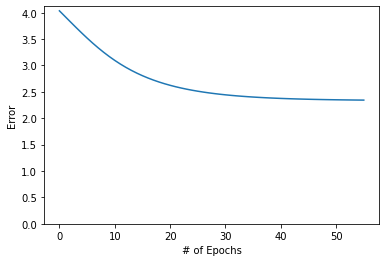

In [4]:
plt.figure(0)
plt.plot(error)
plt.ylabel('Error')
plt.xlabel('# of Epochs')
plt.ylim(0)
plt.show()

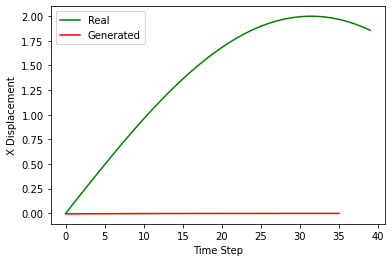

In [5]:
x_generated = []
x_predicted = []
x = training_set[0]
for time in range(window,40):
    _, y = x_network.feed_forward(training_set[time-window:time])
    # _, z = x_network.feed_forward(x)
    # x = z
    # x_predicted.append(z)
    x_generated.append(y)
# print(x_generated, x_predicted)
plt.figure(1)
plt.plot(training_set[:40], color="g", label="Real")
plt.plot(x_generated, color="r", label="Generated")
# plt.plot(x_predicted, color="b", label="Predicted")
plt.xlabel('Time Step')
plt.ylabel('X Displacement')
plt.legend(loc="upper left")
plt.show()

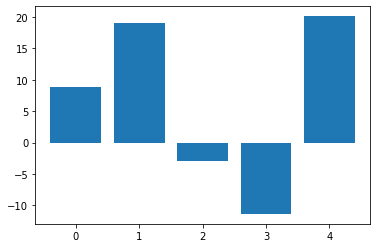

In [6]:
plt.bar(x = range(len(x_network.v)), height=[sum(row) for row in x_network.v])
axis = plt.gca()
# axis.set_xticks()


In [7]:
print(np.array(x_network.w))
print(np.array(x_network.v))

[[ 0.53377407]
 [-0.3856307 ]
 [-0.50013655]
 [ 0.47907559]
 [ 0.11430434]
 [-0.25371195]
 [ 0.13977022]
 [-0.47678527]
 [-0.05914821]
 [ 0.24995397]
 [ 0.18010762]
 [ 0.25653218]
 [-0.33287965]
 [ 0.02186134]
 [-0.43290246]
 [-0.06726563]
 [-0.26639753]
 [-0.17966785]
 [-0.3265976 ]
 [-0.45448373]
 [-0.05574402]
 [-0.4110891 ]
 [ 0.30968895]
 [ 0.1968393 ]
 [ 0.11621238]
 [ 0.01956615]
 [-0.24153556]
 [ 0.15585588]
 [-0.32529409]
 [ 0.00753263]
 [-0.25419217]
 [-0.46900369]
 [ 0.43587356]
 [-0.44146425]
 [ 0.30170021]
 [ 0.22997033]
 [ 0.26977331]
 [-0.39034241]
 [-0.57779236]
 [-0.10123399]
 [ 0.23581443]
 [ 0.25027579]
 [ 0.16056331]
 [-0.34687799]
 [ 0.00513396]
 [-0.4486159 ]
 [-0.52397058]
 [ 0.28054258]
 [-0.49681569]
 [ 0.12803806]
 [ 0.2315436 ]
 [-0.43189934]
 [ 0.19888983]
 [-0.26967558]
 [-0.32737503]
 [-0.38880255]
 [ 0.03736876]
 [ 0.22780667]
 [ 0.15030826]
 [-0.10099607]
 [-0.47886119]
 [-0.28765164]
 [-0.57419866]
 [-0.11797052]
 [-0.55856215]
 [-0.45793677]
 [ 0.06522